<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning_tensorflow/blob/main/2__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Neural Networks for Classification with TensorFlow**

- In this notebook we're going to learn how to write neural networks for classifiaction problems

## **Creating a new dataset to view and fit**

In [13]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles
X, y  = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42)

In [14]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [15]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [16]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


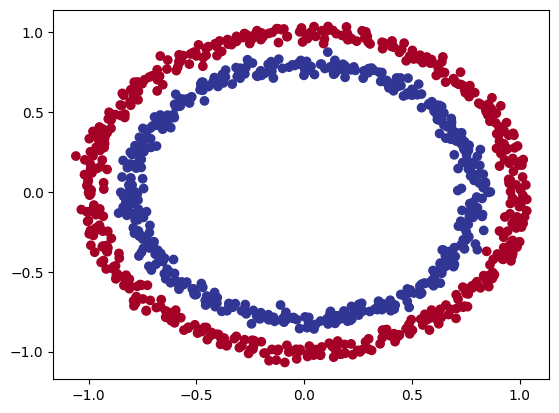

In [17]:
# visualize a plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [18]:
# check shape of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [19]:
# how many samples we're woking

len(X), len(y)

(1000, 1000)

## **Steps in modelling**

In [24]:
import tensorflow as tf
import keras

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2.compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00172),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_1.fit(X,y, epochs = 30)


In [198]:
model_1.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 20)                60        
                                                                 
 dense_110 (Dense)           (None, 5)                 105       
                                                                 
 dense_111 (Dense)           (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [199]:
import numpy as np

In [222]:
# to visualize the model predictions

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by the model predicting on X
  """

  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
#  we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, aplha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-200-19b5b5ed337b>:33: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, aplha = 0.7)


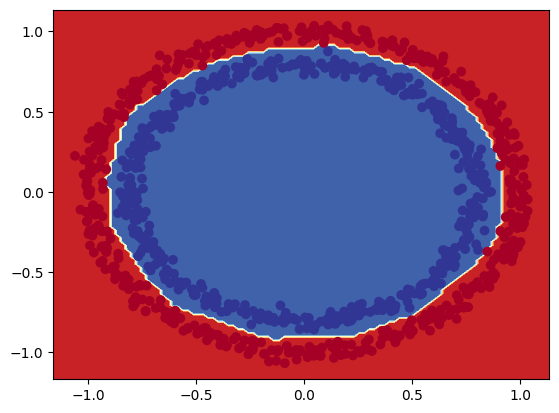

In [201]:
plot_decision_boundary(model = model_1,
                       X = X,
                       y = y)

- So far we have been training and testng on the same dataset.....
- However in machine learning this is sin.
- **So, let's create a training and test set**

In [215]:
# Split into train and test set

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [216]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.keras.utils.set_random_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(115, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

history = model_2.fit(X_train, y_train, epochs = 50)

In [262]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 1.0000


[0.03811869025230408, 1.0]

In [263]:
model_2.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 10)                30        
                                                                 
 dense_152 (Dense)           (None, 115)               1265      
                                                                 
 dense_153 (Dense)           (None, 1)                 116       
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step
doing binary classification
 17/313 [>.............................] - ETA: 0s 

<ipython-input-222-19b5b5ed337b>:33: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, aplha = 0.7)


313/313 [==============================] - 1s 3ms/step
doing binary classification


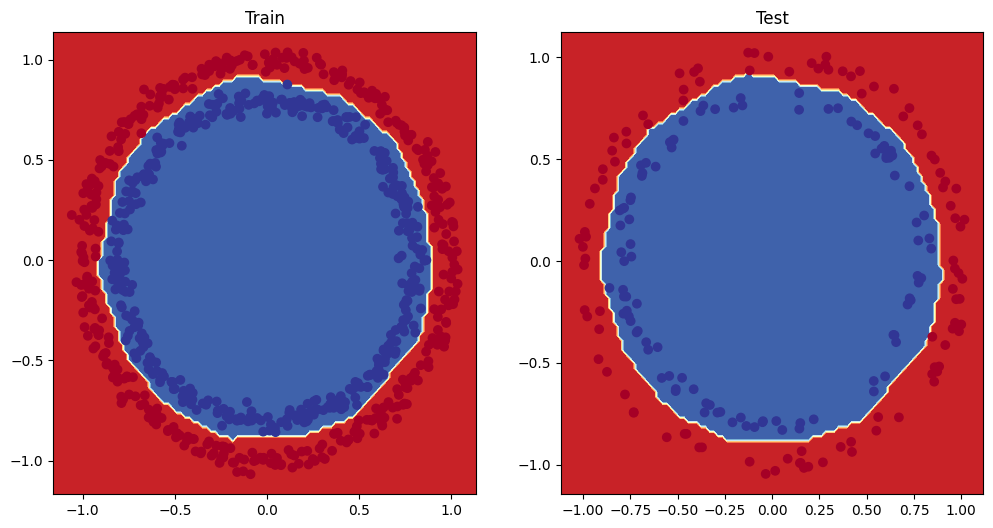

In [264]:
# Plot the decision boundary for train and test set

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X = X_test, y = y_test)
plt.show()

## **How to plot learning curves (training curves)**

In [ ]:
history.history

In [ ]:
# convert history object into dataframe
hist = pd.DataFrame(history.history)
hist

Text(0.5, 1.0, 'Model_2 loss curves')

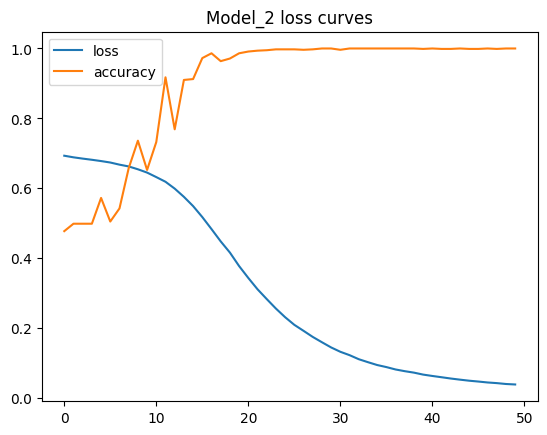

In [267]:
# plot loss curves
hist.plot()
plt.title("Model_2 loss curves")

## **Finding the best Learning Rate**

To find the ideal learning rate we are going to use the following steps:

* A learning rate **callback**
* A model loss curves plot.
* Another model

In [302]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))

# fit the model
history_3 = model_3.fit(X_train, y_train, epochs = 100,
                      callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 4s 6ms/step - loss: 0.6920 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss:

<Axes: xlabel='epochs'>

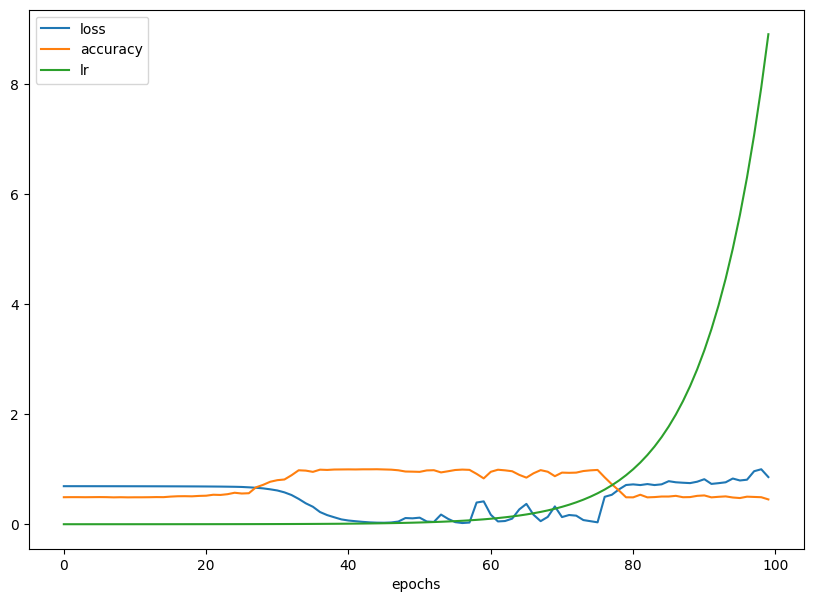

In [303]:
pd.DataFrame(history_3.history).plot(figsize = (10, 7), xlabel = "epochs")

In [304]:
# plot the learning rate to the loss
lrs = 1e-4 * (10** (tf.range(100)/20))

In [305]:
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate v/s Loss')

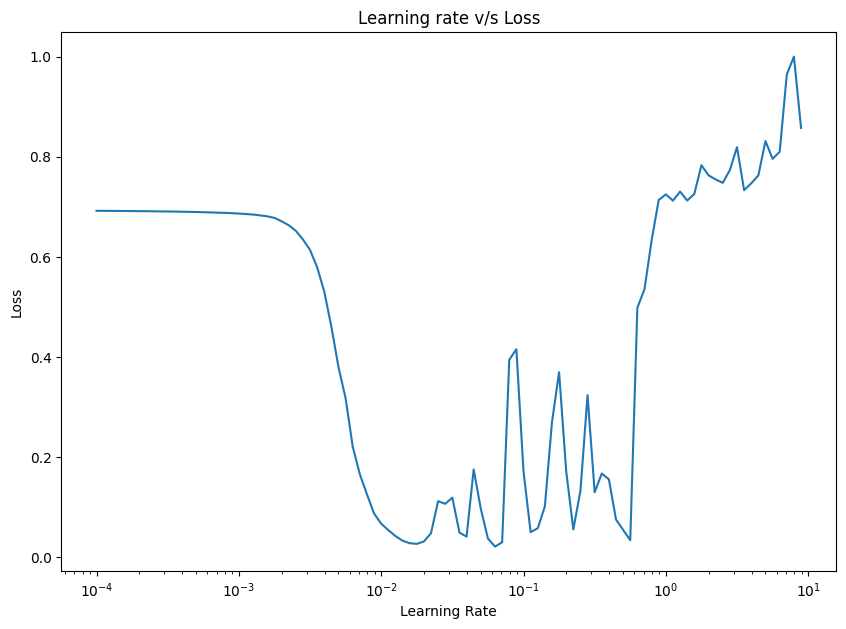

In [306]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s Loss")

### **An ideal learning rate is somewhere between lowest point in the curve and about 10 times smaller than that point.**

- We can see that lowest point in the curve is around 10^(-1),
- So the learning rate would be near to 10^(-2)
- So we can use `learning_rate = 0.002`

### **So we create a new model using ideal learning rate**

In [316]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
                metrics = ['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 5ms/step - loss: 0.6918 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.4950
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5050
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5250
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5337
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5100
Epoch 7/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6815 - accuracy: 0.5462
Epoch 8/25
25/25 [==============================] - 0s 11ms/step - loss: 0.6788 - accuracy: 0.5813
Epoch 9/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6162
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.6112
Epoch 11/25
25/25

313/313 [==============================] - 1s 3ms/step
doing binary classification
 27/313 [=>............................] - ETA: 0s 

<ipython-input-222-19b5b5ed337b>:33: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, aplha = 0.7)


313/313 [==============================] - 1s 2ms/step
doing binary classification


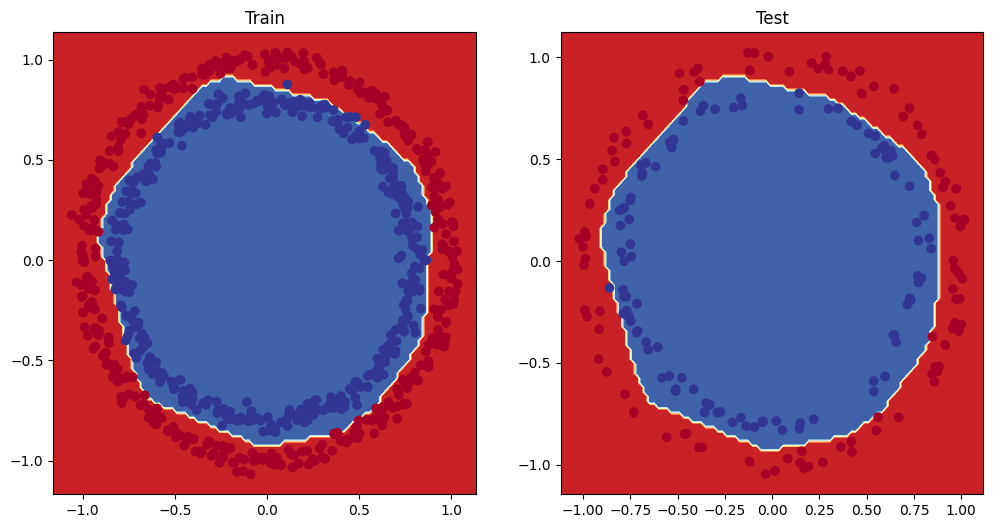

In [318]:
# Plot the decision boundary for train and test set

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X = X_test, y = y_test)
plt.show()

In [317]:
## **Classification Evaluation Methods**



7/7 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.9950
model loss on test set: 0.3925188183784485
model accuracy on test set: 99.50%


## **Accuracy**


In [319]:
# Accuracy

loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"model loss on test set: {loss}")
print(f"model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.9950
model loss on test set: 0.3925188183784485
model accuracy on test set: 99.50%


## **Confusion Matrix**

In [322]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_4.predict(X_test)

# create the confusion matrix

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: ignored

**ValueError**: Classification metrics can't handle a mix of binary and continuous targets.

- Let's see test array and predictions array (y_preds).

In [323]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [324]:
y_preds[:10]

array([[0.68335736],
       [0.79539555],
       [0.5964021 ],
       [0.64868367],
       [0.26273513],
       [0.37495288],
       [0.57292557],
       [0.35775805],
       [0.73617345],
       [0.3599727 ]], dtype=float32)

* Looks like our predictions array has come out in **prediction probability** form....

- **Prediction Probability** is the standard output from sigmoid (or softmax) activation functions.

In [325]:
# convert our prediction probability into binary form
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [326]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  1,  98]])

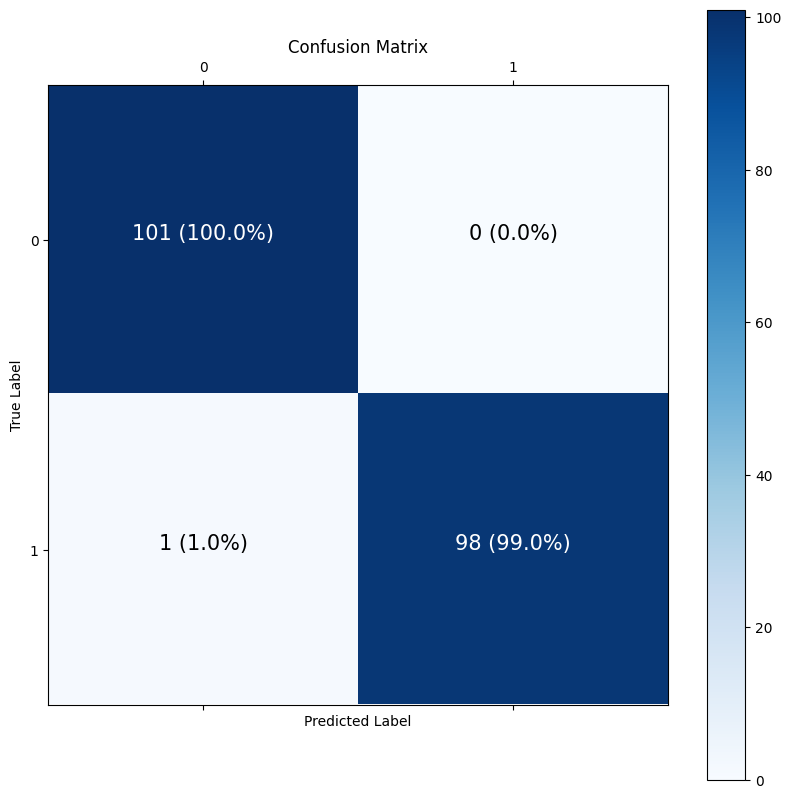

In [330]:
import itertools

figsize = (10, 10)

#create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

#Let's make it cute
fig, ax = plt.subplots(figsize = figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = 'white' if cm[i, j] > threshold else "black",
           size = 15)